> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 

# Exercise Set 14: Classification Trees

*Afternoon, August 21, 2018*

In this Exercise Set 14 we will explore some of the most used tree-based classifiers, beginning with simple decision tree classifiers. 


> **Ex. 14.1.1:** In this exercise set we will work with the titanic dataset. Run the code below to get a variable **data**. Notice the last line of the code - what does it do?
>
>```python
> rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)
> ```
># Feature creation
> ```python
>rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
>rawdata['alone'] = rawdata['alone'].astype(int)
>rawdata['adult_male'] = rawdata['adult_male'].astype(int)
> ```
> The following piece of code (in multiple lines) generates dummies for all of the categorical variables. 
> ```
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)
>```
> Read about decision-tree classification [here](http://scikit-learn.org/stable/modules/tree.html#classification). Try to explain why decision tree classification can _only_ produce splits orthogonal to one of the axes. 

In [2]:
# [Answer to Ex. 14.1.1]

In [3]:
rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)

# Feature creation
rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
rawdata['alone'] = rawdata['alone'].astype(int)
rawdata['adult_male'] = rawdata['adult_male'].astype(int)


# The following piece of code (in multiple lines) generates 
# dummies for all of the categorical variables. 
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)


# Answer: 
# Decision Tree classifiers work by doing greater than/less 
# than splits on each of the variables, so every split is simply a rule 
# for how to classify variables larger or smaller than some threshold on one 
# of the axes. Therefore DT can only produce vertical or horizontal splits (in 2D data). 

> **Ex. 14.1.2:** Use `data` to create a numpy array **X** and an array **y**, y should contain the variable called 'survived', and X should contain all the other variables. Remove all rows containing missing values beforehand.

In [4]:
# [Answer to Ex. 14.1.2]

In [5]:
data = data.dropna().reset_index()

X = np.array(data.drop('survived', axis = 1))
y = np.array(data['survived'])

> **Ex. 14.1.3**: Train a decision tree classifier on **all** of the titanic data.
>
>* If your feature matrix is `X` and your target array is `y` you can do this by instantiating a model like:
>
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(X, y)  # <--- This is the training/fitting/learning step
>       
>Write four functions that counts the number of ..
 - true positives where we call the function `TP`;
 - true negatives where we call the function `TN`;
 - false positives where we call the function `FP`;
 - false negatives where we call the function `FN`.

> All of these functions should take three arguments, the actual y column, the actual X column and a fittedModel object (e.g. `fittedModel = DecisionTreeClassifier.fit(X,y)`)
>
>> _Hint 1:_ use the function `np.where` to compare y and the predicted values. For example `y + prediction == 2` is true only for the True Positives.
>
>> _Hint 2:_ You can check if your result is correct by summing all four functions and checking that the result equals to the number of observations. 

In [6]:
# [Answer to Ex. 14.1.3]

# This will be in assignment 2

> **Ex. 14.1.4:** Combine the four functions you defined above to write your own accuracy function, which calculates
$$
ACC = \frac{TP + TN}{TP+ TN + FP + FN}
$$
>
> Test the accuracy of your model using the `A` function. Report the accuracy of your model on the same data that you trained the model on.
>
>> _Note:_ The reason we want to split the calculation of accuracy into these four components, is that we can then easily calculate other scores, such as the _precision, recall and f1_.

In [ ]:
# [Answer to Ex. 14.1.4]

# This will be in assignment 2

> **Ex. 14.1.5**: So far our model has been achieving an unbelievably high accuracy of 100% correct classification.
>
>1. Why did you get such a high accuracy in the previous exercises?
>2. Split your data into a test and training set of equal size. Train the model only on the training set and report its accuracy on both the training and test sets.
>> Hint: `from sklearn.model_selection import train_test_split` is an easy way to split your data.
>3. Comment on the difference you observe.

In [ ]:
# [Answer to Ex. 14.1.5]

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_dt.fit(X_train, y_train)
acc_train_dt = round(ACC(X_train, y_train, clf_dt), 3)
acc_test_dt = round(ACC(X_test, y_test, clf_dt), 3)
print("On our test data we achieve an accuracy of {}".format(acc_train_dt))
print("but in the test data it is only {}".format(acc_test_dt))
print('This difference is evidence that our model is overfitting.')

On our test data we achieve an accuracy of 1.0
but in the test data it is only 0.744
This difference is evidence that our model is overfitting.


> **Ex. 14.1.6:** Read about the random forest classifier in [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) - how does the RF learner relate to decision trees? Train a random forest classifier, and print its train-accuracy and test-accuracy. How does it compare to the decision tree?

In [ ]:
# [Answer to Ex. 14.1.6]

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train, y_train)

acc_train_rf = ACC(X_train, y_train, clf_rf)
acc_test_rf = ACC(X_test, y_test, clf_rf)
print("Train error: {}".format(acc_train_rf))
print("Test error: {}".format(acc_test_rf))

Train error: 0.9859719438877755
Test error: 0.827906976744186


> **Ex. 14.1.7:** Random forest have a number of hyperparameters that we can use. Often we just use the default settings as they are shown to be pretty good. Sometimes we want to make sure we grow the right number of trees to grow in the forest. Try varying `n_estimators` and plot the resulting curve. 

>> *Hint:* try the `validation_curve` which we learned about in Ex. 13.1.4.



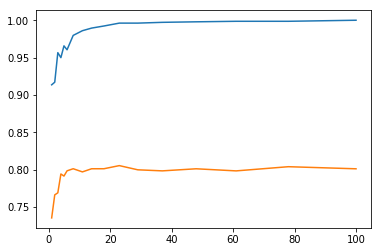

In [84]:
from sklearn.model_selection import validation_curve

n_estimators_rng = np.unique(np.logspace(0,2,20).astype(np.int64))

clf_rf = RandomForestClassifier(n_estimators=10,random_state=2)

train_scores, test_scores = \
    validation_curve(estimator=clf_rf, 
                     X=X, 
                     y=y,
                     param_name='n_estimators', 
                     param_range=n_estimators_rng,
                     cv=5)
    
f,ax = plt.subplots()

ax.plot(n_estimators_rng, np.mean(train_scores, 1), label='Test scores')
ax.plot(n_estimators_rng, np.mean(test_scores, 1), label='Train scores')    

> **Ex. 14.1.8:** Often we want to see the learning curve which shows model scores for test and train data with increasing sample sizes. Try making this plot. Be sure to use the n_estimators you have deemed useful.

> A balanced model should show a declining train and an increasing test score when adding more observations. Is this the case? 

>> *Hint:* try the `validation_curve` which we learned about in Ex. 13.1.4.



In [30]:
from sklearn.model_selection import learning_curve

clf_rf = RandomForestClassifier(n_estimators=20)
train_sizes, train_scores, test_scores = \
    learning_curve(estimator=clf_rf, 
                   train_sizes=np.arange(.1,1,.05),
                   X=X, 
                   y=y,
                   cv=5)

f,ax = plt.subplots()
ax.plot(train_sizes, np.mean(train_scores, 1), label='Test scores')
ax.plot(train_sizes, np.mean(test_scores, 1), label='Train scores')    
ax.set_ylabel('Accuracy')
ax.set_ylabel('Number of observations used')

Text(0,0.5,'Number of observations used')

> **Ex. 14.1.9 (BONUS):** We want to reduce the overfitting in our random forest. Read through the random forest and check which hyperparameters may help mitigating overfitting. You can use validation curves to search these. Try to making a new learning curve.

>> *Hint 1:* Can the number of features used in bootstrapping also be considered a hyperparameter? 

>> *Hint 2:* Can the depth of trees be considered a hyperparameter? 

>> *Hint 3:* sklearn has the built-in `learning_curve` in model_selection.

In [31]:
from sklearn.model_selection import validation_curve
clf_rf = RandomForestClassifier(n_estimators=60)

# STEP 1: we try out 'max_features' and 'max_depth'
hyperparameters = {'max_features':np.arange(2,X.shape[1]),
                   'max_depth':[1,2,3,4,5,6]}

for param_name, param_range in hyperparameters.items():
    train_scores, test_scores = \
        validation_curve(estimator=clf_rf, 
                         X=X, 
                         y=y,
                         param_name=param_name, 
                         param_range=param_range,
                         cv=5)

    f,ax = plt.subplots()

    ax.plot(param_range, np.mean(train_scores, 1), label='Train scores')
    ax.plot(param_range, np.mean(test_scores, 1), label='Test scores')    
    ax.legend()
    ax.set_ylabel('Accuracy')
    ax.set_xlabel(param_name)
    
    
# STEP 2: we try out making learning curves for various max_depth levels

for max_depth in  (3,5,7):
    clf_rf = RandomForestClassifier(n_estimators=20, max_depth=max_depth)
    train_sizes, train_scores, test_scores = \
        learning_curve(estimator=clf_rf, 
                       train_sizes=np.arange(.1,1,.05),
                       X=X, 
                       y=y,
                       cv=5)

    f,ax = plt.subplots()
    ax.plot(train_sizes, np.mean(train_scores, 1), label='Test scores')
    ax.plot(train_sizes, np.mean(test_scores, 1), label='Train scores')    
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Number of observations used')
    ax.set_title('Max depth: %i' % max_depth)